In [149]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from mpl_toolkits import mplot3d
import plotly.graph_objects as go

# Generating Data

In [123]:
e = math.e
def sigmoid(x, w0=0, w1=1):
    return 1 / (1 + np.exp(-(w0 + w1*x)))

In [124]:
x = np.linspace(2, 25, 10)
x = x.round(1)
x

array([ 2. ,  4.6,  7.1,  9.7, 12.2, 14.8, 17.3, 19.9, 22.4, 25. ])

In [125]:
def shuffle(y):
    for i in range(len(y)):
        noise = 0
        if np.random.rand() < 0.5:
            noise = -np.random.randn()
        else:
            noise = np.random.randn()
            
        y[i] += 0.1 * noise
    return y

In [126]:
y = sigmoid(x, -10, 0.75)
y = shuffle(y)

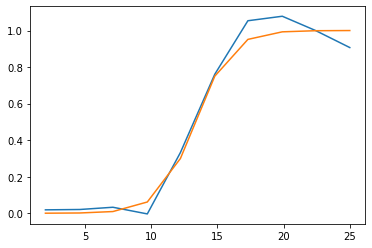

In [127]:
plt.plot(x, y)
plt.plot(x, sigmoid(x, -10, 0.75))
plt.show()

In [132]:
data = pd.DataFrame()
data['x'] = x
y = y.round(2)
data['y'] = y

In [133]:
# data.to_csv('data.csv', index=False)

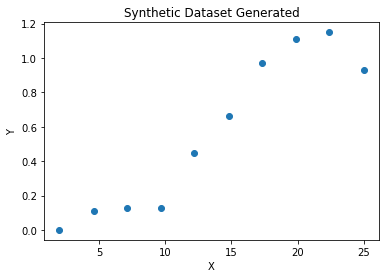

In [185]:
plt.title("Synthetic Dataset Generated")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x, y)

In [186]:
data

,x,y
0,2.0,-0.00
1,4.6,0.11
2,7.1,0.13
3,9.7,0.13
4,12.2,0.45
5,14.8,0.66
6,17.3,0.97
7,19.9,1.11
8,22.4,1.15
9,25.0,0.93


# Visualizing Loss Function

In [136]:
data = pd.read_csv('data.csv')
x = data['x'].values
y = data['y'].values

In [165]:
def loss(w0, w1, x, y):
    y_pred = sigmoid(x, w0, w1)
    loss = np.square(y_pred - y).sum()
    return loss

In [176]:
loss(0, 1, x, y), loss(-10, 0.75, x, y), loss(6, -5, x, y)

(3.5210420925406685, 0.10367458169813282, 5.0447234946409)

In [181]:
w0s = np.linspace(-40, 20, 100)
w1s = np.linspace(-5, 5, 100)

losses = pd.DataFrame(columns=['w0', 'w1', 'loss'])
losses_plotly = []
for w0 in w0s:
    loss_w0 = []
    for w1 in w1s:
        loss_ = loss(w0, w1, x, y)
        losses.loc[len(losses)] = [w0, w1, loss_]
        loss_w0.append(loss_)
    
    losses_plotly.append(loss_w0)
losses

,w0,w1,loss
0,-40.0,-5.00000,5.0444
1,-40.0,-4.89899,5.0444
2,-40.0,-4.79798,5.0444
3,-40.0,-4.69697,5.0444
4,-40.0,-4.59596,5.0444
...,...,...,...
9995,20.0,4.59596,3.7644
9996,20.0,4.69697,3.7644
9997,20.0,4.79798,3.7644
9998,20.0,4.89899,3.7644


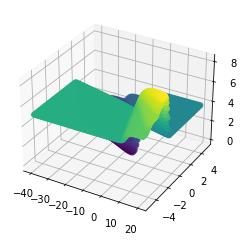

In [182]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(losses['w0'], losses['w1'], losses['loss'], c = losses['loss'])

In [197]:
fig = go.Figure(data = [go.Surface(z = losses_plotly, x = w1s, y = w0s)])
fig.update_layout(title='Non Convex Loss Function', autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene=dict(xaxis_title="w1", yaxis_title="w0", zaxis_title="J(w0, w1)")
                 )

fig.show()


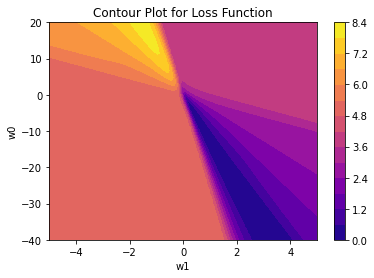

In [195]:
plt.contourf(w1s, w0s, losses_plotly, cmap = "plasma", levels = 15)
plt.xlabel("w1")
plt.ylabel("w0")
plt.title("Contour Plot for Loss Function")
plt.colorbar()